In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
import metapredict as meta

metapredict_version = 3


## Synthetic folded proteins

The sequences below are taken from:

Anishchenko, I., Pellock, S. J., Chidyausiku, T. M., Ramelot, T. A., Ovchinnikov, S., Hao, J., Bafna, K., Norn, C., Kang, A., Bera, A. K., DiMaio, F., Carter, L., Chow, C. M., Montelione, G. T., & Baker, D. (2021). De novo protein design by deep network hallucination. Nature, 600(7889), 547–552.

In [2]:


# M=21 (note position here is 1 indexed)
seq_0217 = 'MGSSHHHHHHSSGLVPRGSHMSPIARQALDIAKSVLEHSKGMFDYWEGMLEQYEKTGDPDQANKLRQTLNRVKNSVGRLESALKRAERAYDTGNPDAAVGAVVELIGNVHEIMSTFHELFG'

# M=21 (note position here is 1 indexed)
seq_0738 = 'MGSSHHHHHHSSGLVPRGSHMNIQVSLQWEDPKKGKVFSHTVNIPPGGTAEQIADNILDMARSLQDEGWDKLTVQVTVNPGFPKETAMRVAAALKEAFEDRGLRLTSIETSGNSIHLKFRY'

# M=1 (note position here is 1 indexed)
seq_0515 = 'MDFTERLDRLVKYAKEIAKWYKESGDPDFANSVDNVLGHLENIRKAFKHGDPARAMDHVSNVVGSLDSIQTSFKQTGNPEIATRWQELTQEVRELYAYLG'



In [3]:
def plot_disorder(seq, outname, start):

    figure(num=None, figsize=(3, 1), dpi=300, facecolor='w', edgecolor='k')
    ax = plt.gca()

    d = meta.predict_disorder_domains(seq, version=metapredict_version)
    idx = np.arange(1,len(seq)+1)


    idr_scores = False
    for idr_b in d.disordered_domain_boundaries:
        idr_scores = d.disorder[idr_b[0]:idr_b[1]]
        idr_idx = np.arange(1+idr_b[0], idr_b[1]+1)


    if idr_scores is not False:
        plt.fill_between(idr_idx, idr_scores, color='r',alpha=0.4,linewidth=0)
    plt.xlim([idx[0], idx[-1]])

    plt.plot(idx, d.disorder,'k',linewidth=0.5)
    plt.plot(idx, d.disorder,'r',linewidth=0.3)
    plt.ylim([0,1])
    plt.plot([start,start],[0,1],'--k', linewidth=0.5)

    plt.tight_layout()
    print()
    plt.savefig(outname)

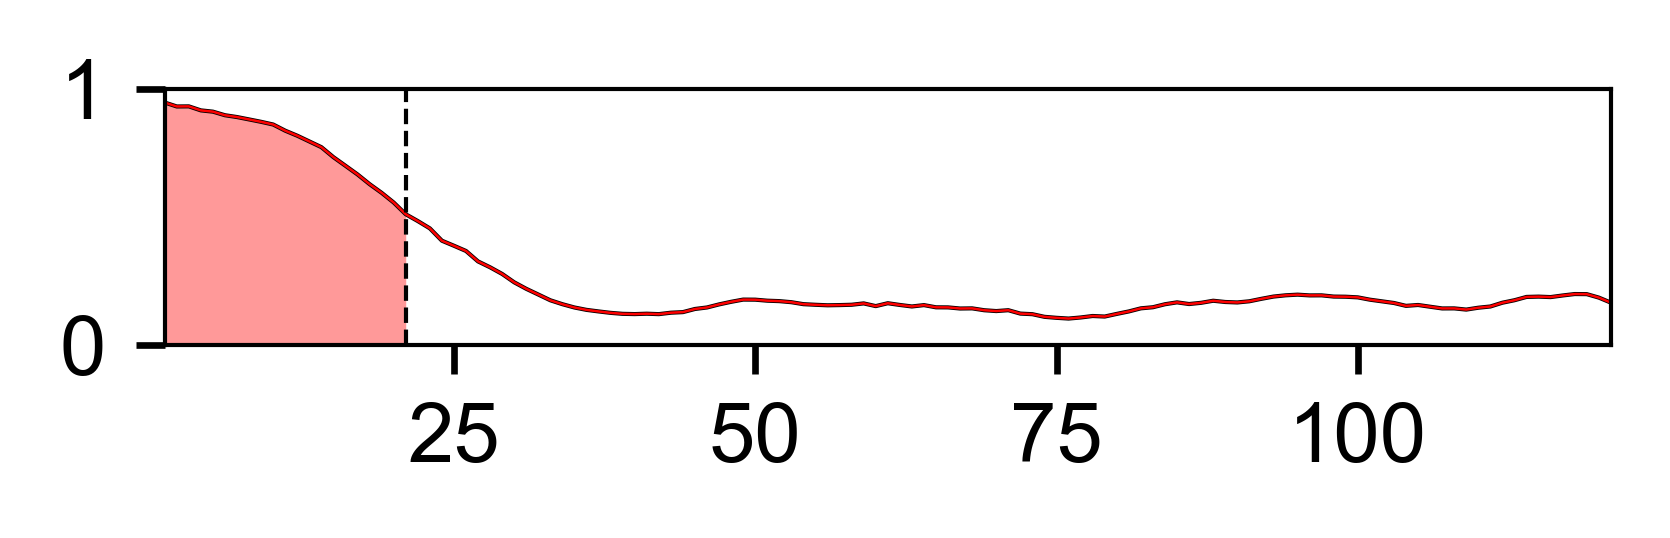

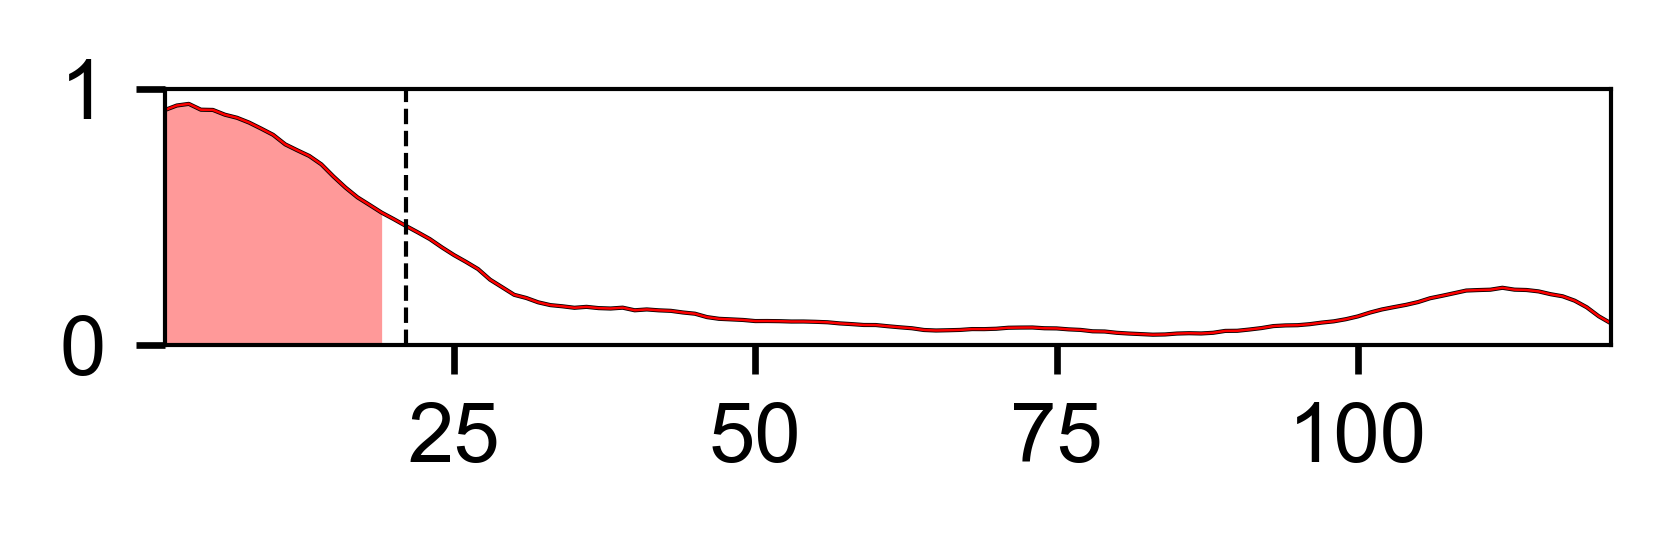

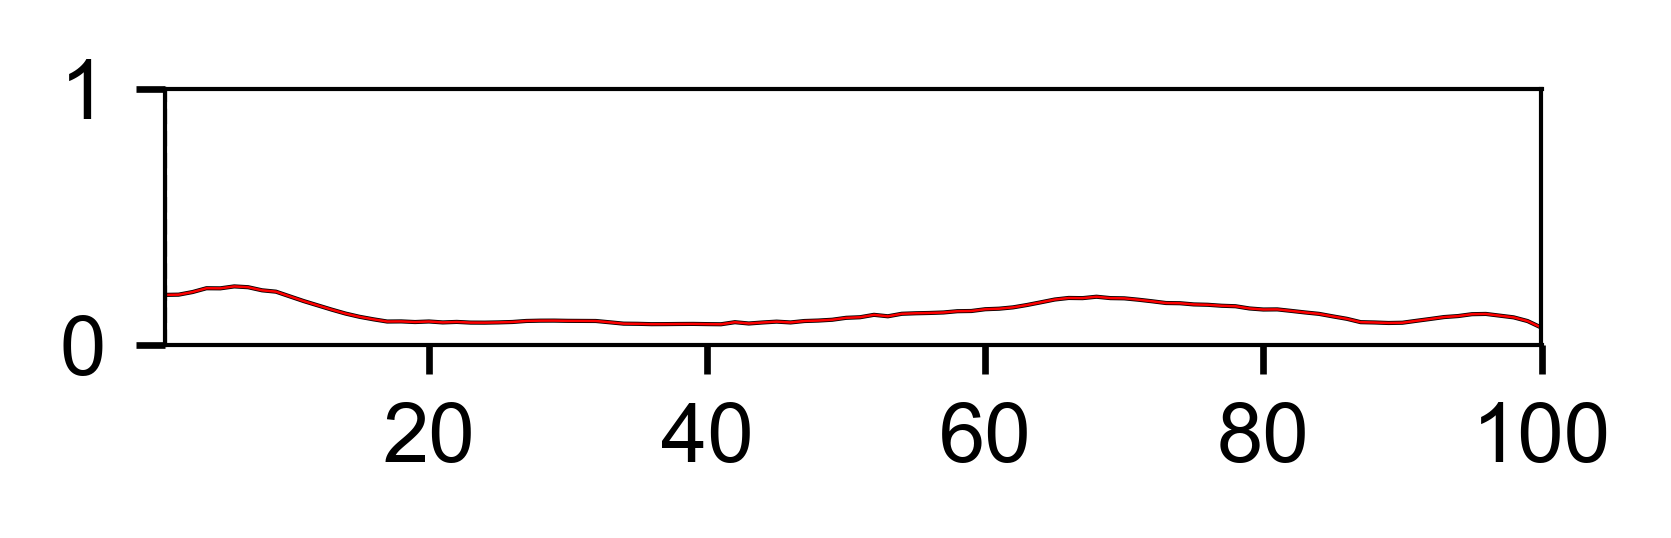

In [4]:
# 21 = initiatior methionine 
plot_disorder(seq=seq_0217,outname=f'figures/seq_0217_metapredict_v{metapredict_version}.pdf',start=21)

# 21 = initiatior methionine 
plot_disorder(seq=seq_0738,outname=f'figures/seq_0738_metapredict_v{metapredict_version}.pdf',start=21)

# 1 = initiatior methionine 
plot_disorder(seq=seq_0515,outname=f'figures/seq_0515_metapredict_v{metapredict_version}.pdf',start=1)

